In [2]:
import numpy as np
from itertools import accumulate
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [34]:
def BanditGenerator(i):
    if i in [0,1,2,3,4]:
        return np.random.normal(0, 10)
    if i in [5,6,7,8]:
        return np.random.normal(1,0.1)
    if i == 9:
        return np.random.normal(1.1,0.1)

def random_index_of_max(lst):
    max_val = max(lst)
    max_indices = [i for i, val in enumerate(lst) if val == max_val]
    if len(max_indices) == 1:
        return max_indices[0]
    else:
        return random.choice(max_indices)

def random_index_of_NOT_max(lst):
    max_val = max(lst)
    not_max_indices = [i for i, val in enumerate(lst) if val != max_val]
    if len(not_max_indices) == 1:
        return not_max_indices[0]
    else:
        return random.choice(not_max_indices)

def cumsum(lst):
    return list(accumulate(lst))

def divide_list(lst, divisor):
    return [num / divisor for num in lst]

def multiply_list(lst, multiplier):
    return [num * multiplier for num in lst]

In [35]:
average_percentage_list = []

for k in range(50):
    print(k)

    #eps-greedy
    Q = [0]*10
    probabilities = [0.8, 0.2] # eps-greedy parameters

    i_bandit = random.randint(0, 9)

    optimal_bandit = 9
    optimal_action_history = []
    alfa = 0.1

    probabilities = [0.1,0.9] 
    N_GAMES = 10000
    for number_plays in range(1,N_GAMES+1):

        value_from_i_th_bandit = BanditGenerator(i_bandit)

        Q[i_bandit]= Q[i_bandit]+alfa*(value_from_i_th_bandit-Q[i_bandit])

        greedy_choice = np.random.choice([0, 1], p=probabilities)

        max_index = Q.index(max(Q))
        if greedy_choice:
            i_bandit = random_index_of_max(Q) 
        else:
            i_bandit = random_index_of_NOT_max(Q)

        if i_bandit==optimal_bandit:
            optimal_action_history.append(1)
        else:
            optimal_action_history.append(0)
            
    cumsuma = cumsum(optimal_action_history)
    divided_list = [num / (index + 1) for index, num in enumerate(cumsuma)]
    percentge_list = multiply_list(divided_list,100)
    
    average_percentage_list.append(percentge_list)
            
average_list = [sum(x) / len(x) for x in zip(*average_percentage_list)]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [36]:
#GREEDY
average_percentage_list_greedy = []

for k in range(50):
    print(k)
    Q = [5]*10

    i_bandit = random.randint(0, 9)

    optimal_bandit = 9
    optimal_action_history = []
    alfa = 0.1

    N_GAMES = 10000
    for number_plays in range(1,N_GAMES+1):
        value_from_i_th_bandit = BanditGenerator(i_bandit)
        Q[i_bandit]= Q[i_bandit]+alfa*(value_from_i_th_bandit-Q[i_bandit])

        max_index = Q.index(max(Q))
        i_bandit = random_index_of_max(Q)

        if i_bandit==optimal_bandit:
            optimal_action_history.append(1)
        else:
            optimal_action_history.append(0)

    cumsuma = cumsum(optimal_action_history)
    divided_list = [num / (index + 1) for index, num in enumerate(cumsuma)]
    percentge_list_GREEDY = multiply_list(divided_list,100)
    
    average_percentage_list_greedy.append(percentge_list_GREEDY)
    
average_list_greedy = [sum(x) / len(x) for x in zip(*average_percentage_list_greedy)]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


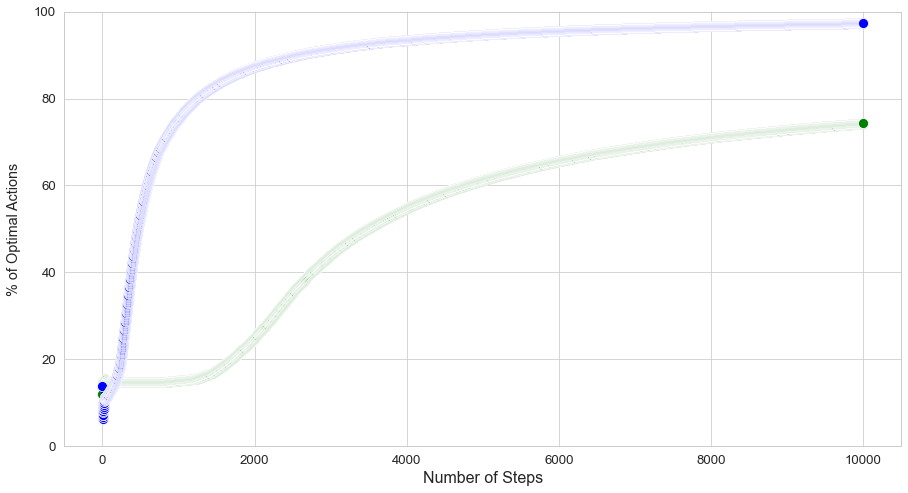

In [37]:
plt.figure(figsize=(15, 8))

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)


sns.lineplot(x=range(1, N_GAMES + 1), y=average_list, marker='o', linewidth=3, markersize=10,color='green')
sns.lineplot(x=range(1, N_GAMES + 1), y=average_list_greedy, marker='o', linewidth=3, markersize=10,color='blue')

plt.text(-0.06, 0.5, '% of Optimal Actions', ha='center', va='center', rotation='vertical', transform=plt.gca().transAxes)
plt.ylim(0, 100)
plt.xlabel('Number of Steps', fontsize=16)

plt.show()